In [1]:
import matplotlib.pyplot as plt
import itertools
import random
import copy
import numpy as np

In [2]:
class Schelling:
        
    def __init__(self, width, height, empty_ratio, similarity_threshold, n_iterations, races):
        self.width = width
        self.height = height
        self.n = width * height
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.n_iterations = n_iterations
        self.races = races
    
    def populate(self):
        self.empty_houses = []
        self.agents = {}
        self.all_houses = list(itertools.product(list(range(self.width)),list(range(self.height))))
        random.shuffle(self.all_houses)
        self.n_empty = int(self.empty_ratio * self.n)
        self.empty_houses = self.all_houses[-self.n_empty:]
        self.remaining_houses = self.all_houses[:self.n - self.n_empty]
        for n in self.remaining_houses:
            b = random.randint(1,self.races)
            self.agents[n] = b
        print(self.empty_houses[:3])
        print(self.remaining_houses[:3])
        print(self.agents)
    
    def plot_city(self):
        fig, ax = plt.subplots(figsize=(self.width*0.5, self.height*0.5))
        cols = ['r','g','b','k','c','m','y']
        for key,value in self.agents.items():
            ax.scatter(key[0]+0.5, key[1]+0.5, s=500, marker = 's', c=cols[value-1]) 
        ax.set_xlim([0, self.width])
        ax.set_ylim([0, self.height])
        ax.set_xticks(np.arange(0, self.width, 1))
        ax.set_yticks(np.arange(0, self.height, 1))
        ax.grid()
        plt.show()

    def is_unsatisfied(self, house):
        race = self.agents[house]
        locs = [[0, 0], [0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 2]]
        same_race = 0
        diff_race = 0
        x = house[0]-1
        y = house[1]-1
        for i in locs:
            nbor = []
            nbor.append(i[0] + x)
            nbor.append(i[1] + y)
            nbor_tup = tuple(nbor)
            if nbor_tup in self.agents:
                if self.agents[nbor_tup] == race:
                    same_race += 1
                else:
                    diff_race += 1
        if same_race == diff_race == 0:
            return False
        elif same_race/(same_race + diff_race) < self.similarity_threshold:
            return True
        else:
            return False 
        
    def update(self,show_new=False,show_old=False):
        if show_old == True:
            print("Original:")
            self.plot_city()
        count = 0
        for house in self.remaining_houses:
            if self.is_unsatisfied(house)==True:
                race = self.agents[house]
                random.shuffle(self.empty_houses)
                new_house = self.empty_houses[0]
                self.remaining_houses.append(new_house)
                self.empty_houses.remove(new_house)
                self.remaining_houses.remove(house)
                self.empty_houses.append(house)
                self.agents.pop(house)
                self.agents[new_house] = race
                count += 1
        if show_new == True:
            print(count)
            print("New:")
            self.plot_city()

    def sim(self):
        exclusions = []
        sim_index_list = []
        for house in self.agents:
            race = self.agents[house]
            locs = [[0, 0], [0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 2]]
            same_race = 0
            diff_race = 0
            x = house[0]-1
            y = house[1]-1
            for i in locs:
                nbor = []
                nbor.append(i[0] + x)
                nbor.append(i[1] + y)
                nbor_tup = tuple(nbor)
                if nbor_tup in self.agents:
                    if self.agents[nbor_tup] == race:
                        same_race += 1
                    else:
                        diff_race += 1
            if same_race == diff_race == 0:
                exclusions.append(house)
            else:
                sim_ratio = same_race / (same_race + diff_race)
                sim_index_list.append(sim_ratio)
        sim_index = sum(sim_index_list) / len(sim_index_list)
        print(sim_index)
        if exclusions != []:
            print("Exclusions: ", exclusions)



#### B. Write a method called **populate** which can be used to create an initial distribution of people in the grid.

To do this, we will try to design the method as follows:

1. the method creates new attributes: ```self.empty_houses``` as an empty list, ```self.agents``` as an empty dictionary. 
2. the method creates a new attribute ```self.all_houses``` as a list of all houses (hint: use ```itertools```, see suggestions below)
3. the method randomizes the allocation of houses (hint: use ```random.shuffle()``` for this task, see below)
4. the method creates a new attribute ```self.n_empty``` which is derived as the number of the empty houses (this is calculated by using the ```self.empty_ratio``` and the number of houses in the city )
5. the method sets the empty_houses to be the last ```self.n_empty``` houses
6. the remaining houses are assigned to ```self.remaining_houses```
7. we use ```self.remainging_houses``` to assign races to each house, creating a variable called ```houses_by_races```
8. we fill the dictionary ```self.agents``` with the ```house_by_race``` in which each agent lives (hint: use ```zip``` and the ```update``` method for dictionaries.


[(11, 3), (19, 1), (9, 3)]
[(18, 8), (3, 3), (7, 6)]
{(18, 8): 3, (3, 3): 2, (7, 6): 3, (2, 6): 3, (8, 0): 3, (16, 1): 1, (13, 4): 3, (12, 0): 2, (9, 8): 1, (4, 8): 2, (14, 1): 1, (13, 2): 2, (15, 7): 3, (7, 5): 2, (2, 4): 3, (11, 5): 2, (11, 4): 2, (16, 5): 2, (5, 3): 3, (1, 9): 2, (1, 5): 1, (4, 2): 2, (2, 8): 1, (17, 9): 2, (2, 2): 3, (4, 1): 3, (16, 0): 2, (17, 8): 3, (18, 7): 2, (1, 7): 3, (4, 0): 2, (4, 3): 3, (0, 3): 1, (8, 9): 3, (13, 3): 2, (10, 9): 3, (3, 1): 3, (11, 7): 1, (12, 5): 1, (3, 8): 3, (9, 2): 1, (14, 9): 1, (18, 1): 2, (8, 1): 1, (2, 1): 2, (2, 5): 3, (0, 7): 1, (4, 9): 1, (16, 8): 3, (3, 5): 2, (18, 4): 1, (0, 8): 2, (0, 6): 2, (19, 0): 3, (3, 0): 3, (6, 8): 3, (12, 6): 1, (0, 4): 1, (0, 2): 3, (13, 9): 3, (11, 9): 3, (13, 0): 1, (18, 9): 3, (19, 6): 2, (5, 8): 2, (0, 9): 1, (15, 8): 3, (11, 2): 1, (7, 2): 2, (17, 7): 1, (19, 5): 2, (11, 0): 2, (7, 3): 3, (10, 3): 2, (13, 7): 3, (0, 1): 2, (9, 6): 3, (14, 7): 2, (17, 5): 2, (12, 9): 1, (5, 2): 1, (6, 9): 2, (14, 

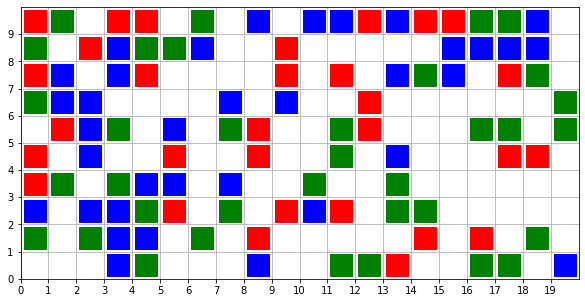

64
New:


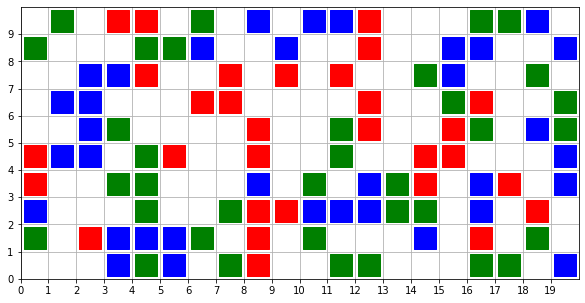

0.4731666666666667


In [3]:
test = Schelling(20,10,0.5,0.5,4,3)
test.populate()
test.update(True,True)
test.sim()

49
New:


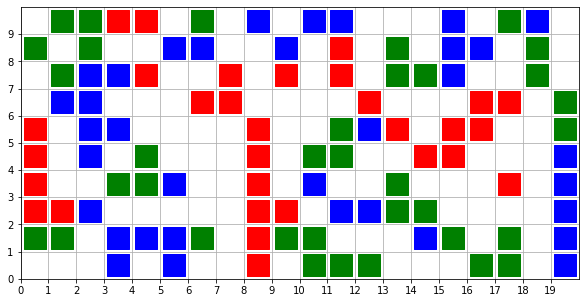

0.6447811447811446
Exclusions:  [(17, 3)]


In [4]:
test.update(True)
test.sim()

In [5]:
#test.sim()

In [6]:
# random.shuffle(test.empty_houses)
# print(test.empty_houses[0])

In [7]:
# empty = [(6, 2), (5, 2), (9, 5), (4, 5), (18, 6), (2, 1), (17, 0), (11, 6), (3, 2), (16, 4), (6, 0), (18, 8), (12, 9), (6, 3), (10, 9), (8, 7), (13, 3), (8, 4), (14, 6), (0, 5), (4, 0), (17, 5), (2, 3), (17, 6), (16, 3), (10, 1), (18, 7), (1, 0), (5, 4), (17, 8), (11, 4), (3, 6), (1, 2), (6, 7), (3, 1), (10, 8), (11, 3), (11, 0), (6, 9), (5, 8), (12, 1), (0, 6), (16, 8), (6, 8), (19, 5), (9, 4)]
# remaining = [(1, 1), (8, 5), (4, 2), (15, 8), (4, 8), (17, 7), (19, 0), (7, 7), (11, 5), (3, 0), (12, 2), (12, 6), (14, 8), (4, 1), (8, 9), (0, 1), (13, 2), (0, 0), (15, 6), (1, 6), (18, 9), (16, 1), (10, 4), (8, 0), (13, 0), (15, 4), (14, 2), (16, 9), (14, 5), (13, 6), (2, 2), (19, 2), (3, 9), (10, 0), (19, 9), (10, 2), (18, 5), (8, 8), (11, 1), (12, 5), (18, 4), (13, 7), (16, 0), (0, 8), (16, 2), (7, 6), (11, 9), (14, 9), (9, 3), (19, 8), (2, 4), (16, 6), (5, 3), (8, 3), (7, 1), (12, 7), (16, 5), (9, 6), (7, 8), (8, 1), (14, 0), (0, 9), (7, 3), (13, 9), (7, 4), (9, 8), (17, 9), (6, 1), (6, 5), (15, 7), (1, 4), (18, 2), (3, 7), (14, 7), (1, 3), (11, 8), (11, 7), (9, 0), (18, 1), (2, 9), (18, 0), (19, 3), (15, 2), (12, 3), (2, 7), (17, 3), (6, 4), (7, 5), (5, 7), (3, 5), (17, 2), (9, 1), (1, 5), (9, 2), (12, 0), (16, 7), (8, 6), (19, 4), (14, 1), (10, 5), (3, 3), (5, 5), (2, 0), (6, 6), (10, 3), (11, 2), (13, 8), (10, 6), (17, 1), (1, 8), (12, 8), (4, 3), (15, 1), (19, 7), (14, 4), (10, 7), (7, 2), (0, 3), (4, 7), (15, 9), (3, 8), (0, 7), (5, 1), (2, 8), (14, 3), (19, 1), (7, 0), (7, 9), (13, 5), (5, 6), (4, 4), (4, 6), (17, 4), (2, 6), (5, 0), (12, 4), (18, 3), (15, 3), (2, 5), (4, 9), (3, 4), (9, 9), (13, 4), (0, 4), (15, 5), (0, 2), (15, 0), (8, 2), (1, 7), (1, 9), (13, 1), (5, 9), (9, 7), (19, 6)]
# agents = {(1, 1): 3, (8, 5): 1, (4, 2): 7, (15, 8): 4, (4, 8): 6, (17, 7): 4, (19, 0): 7, (7, 7): 1, (11, 5): 4, (3, 0): 1, (12, 2): 2, (12, 6): 1, (14, 8): 1, (4, 1): 2, (8, 9): 6, (0, 1): 2, (13, 2): 6, (0, 0): 3, (15, 6): 1, (1, 6): 4, (18, 9): 7, (16, 1): 1, (10, 4): 5, (8, 0): 4, (13, 0): 6, (15, 4): 7, (14, 2): 7, (16, 9): 2, (14, 5): 5, (13, 6): 3, (2, 2): 4, (19, 2): 6, (3, 9): 5, (10, 0): 4, (19, 9): 1, (10, 2): 3, (18, 5): 1, (8, 8): 6, (11, 1): 4, (12, 5): 6, (18, 4): 4, (13, 7): 3, (16, 0): 3, (0, 8): 2, (16, 2): 1, (7, 6): 5, (11, 9): 3, (14, 9): 3, (9, 3): 2, (19, 8): 1, (2, 4): 5, (16, 6): 7, (5, 3): 7, (8, 3): 1, (7, 1): 2, (12, 7): 1, (16, 5): 4, (9, 6): 6, (7, 8): 2, (8, 1): 7, (14, 0): 3, (0, 9): 7, (7, 3): 7, (13, 9): 2, (7, 4): 7, (9, 8): 1, (17, 9): 3, (6, 1): 4, (6, 5): 5, (15, 7): 6, (1, 4): 1, (18, 2): 7, (3, 7): 7, (14, 7): 7, (1, 3): 2, (11, 8): 3, (11, 7): 2, (9, 0): 3, (18, 1): 3, (2, 9): 2, (18, 0): 4, (19, 3): 2, (15, 2): 7, (12, 3): 6, (2, 7): 3, (17, 3): 7, (6, 4): 6, (7, 5): 6, (5, 7): 6, (3, 5): 7, (17, 2): 3, (9, 1): 1, (1, 5): 1, (9, 2): 5, (12, 0): 2, (16, 7): 4, (8, 6): 2, (19, 4): 2, (14, 1): 2, (10, 5): 3, (3, 3): 5, (5, 5): 3, (2, 0): 1, (6, 6): 4, (10, 3): 1, (11, 2): 5, (13, 8): 2, (10, 6): 1, (17, 1): 5, (1, 8): 4, (12, 8): 4, (4, 3): 2, (15, 1): 7, (19, 7): 4, (14, 4): 3, (10, 7): 6, (7, 2): 2, (0, 3): 7, (4, 7): 1, (15, 9): 6, (3, 8): 6, (0, 7): 5, (5, 1): 6, (2, 8): 6, (14, 3): 4, (19, 1): 1, (7, 0): 1, (7, 9): 4, (13, 5): 3, (5, 6): 4, (4, 4): 5, (4, 6): 2, (17, 4): 2, (2, 6): 4, (5, 0): 1, (12, 4): 6, (18, 3): 2, (15, 3): 3, (2, 5): 1, (4, 9): 3, (3, 4): 2, (9, 9): 3, (13, 4): 4, (0, 4): 4, (15, 5): 5, (0, 2): 1, (15, 0): 3, (8, 2): 3, (1, 7): 6, (1, 9): 6, (13, 1): 2, (5, 9): 5, (9, 7): 5, (19, 6): 4}

In [8]:
# width = 8
# height = 4
# a= list(itertools.product(list(range(width)),list(range(height))))
# random.shuffle(a)
# print(a)

In [9]:
# c=2
# b = a[-c:]
# d=a[:32-c]
# print(b)
# print(d)

In [10]:
# x = {}
# for n in d:
#     y = n
#     b = random.randint(1,5)
#     x[y] = b
# print(x)

In [11]:
# a = {(2, 2): 3, (0, 1): 2, (1, 4): 1, (0, 2): 1, (1, 0): 1, (0, 3): 1, (2, 4): 1, (3, 4): 2, (2, 0): 2, (1, 3): 1, (0, 0): 3, (3, 0): 1, (2, 1): 1, (1, 1): 1, (2, 3): 3, (3, 3): 3}
# width = 4
# height = 5
# figsize = (width, height)
# fig, ax = plt.subplots(figsize=(width*0.5,height*0.5))
# ax.grid()
# cols = ['r','g','b','k','c','m','y']
# for key,value in a.items():
#     ax.scatter(key[0]+0.5, key[1]+0.5, s=500, marker = 's', c=cols[value-1]) 
# ax.set_xlim([0, width])
# ax.set_ylim([0, height])
# ax.set_xticks(np.arange(0, width, 1))
# ax.set_yticks(np.arange(0, height, 1))
# plt.show()

In [12]:
# asd={(2, 2): 3, (0, 1): 2, (1, 4): 1, (0, 2): 1, (1, 0): 1, (0, 3): 1, (2, 4): 1, (3, 4): 2, (2, 0): 2, (1, 3): 1, (0, 0): 3, (3, 0): 1, (2, 1): 1, (1, 1): 1, (2, 3): 3, (3, 3): 3}
# asd.pop((2,2))
# print(asd)